### imports

In [1]:
#import neccessary packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#set some of the display options
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_colwidth', None)

# Read and Clean the data

In [3]:
#read clean_kaggle_data file
kaggle_data = pd.read_csv('clean_kaggle_data.csv')

# check top 5 rows
kaggle_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (74,78,115,147,154,172,176,213,225,229,232) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,40000,$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)","Journal Publications (traditional publications, preprint journals, etc)",NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,NaN,NaN,NaN,-1,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",0,-1,-1,-1,-1,-1,1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,PyCharm,NaN,MATLAB,NaN,Spyder,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,Python,R,SQL,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,NaN,NaN,-1,Python,-1,NaN,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,CPUs,GPUs,NaN,NaN,NaN,-1,Never,1-2 years,Linear or Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,N

# Rename the columns

In [4]:
#rename first column to id
kaggle_data.rename(columns={'Unnamed: 0':'id'}, inplace = True)

#set the id as index
kaggle_data.set_index('id', inplace = True)

In [5]:
#map the question prompt to keywords
question_mapping = {'Time from Start to Finish (seconds)': 'survey_duration',
                    'Q1':'age',    
                    'Q2':'gender',
                    'Q3':'country',
                    'Q4':'education',
                    'Q5':'job_title',
                    'Q6':'company_size',
                    'Q7':'DS_team_size',
                    'Q8':'is_ML_used',
                    'Q9':'job_activities',
                    'Q10':'salary_USD',
                    'Q11':'money_spent_ML_cloud',
                    'Q12':'DS_info_source',
                    'Q13':'DS_learning_platform',
                    'Q14':'DS_primary_tool',
                    'Q15':'DS_coding_experience',
                    'Q16':'IDE',
                    'Q17':'notebook',
                    'Q18':'programming_language',
                    'Q19':'recommended_programming_language',
                    'Q20':'visulization_library',
                    'Q21':'hardware',
                    'Q22':'has_used_TPU',
                    'Q23':'ML_experience',
                    'Q24':'ML_algorithm',
                    'Q25':'ML_tool_category',
                    'Q26':'CV_method',
                    'Q27':'NLP_method',
                    'Q28':'ML_framework',
                    'Q29':'cloud_computing_platform',
                    'Q30':'cloud_computing_product',
                    'Q31':'big_data_product',
                    'Q32':'ML_product',
                    'Q33':'AutoML_tool',
                    'Q34':'relational_DB_product'
                   }

question_prompt  = pd.DataFrame.from_records([question_mapping])
question_prompt

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34
0,survey_duration,age,gender,country,education,job_title,company_size,DS_team_size,is_ML_used,job_activities,salary_USD,money_spent_ML_cloud,DS_info_source,DS_learning_platform,DS_primary_tool,DS_coding_experience,IDE,notebook,programming_language,recommended_programming_language,visulization_library,hardware,has_used_TPU,ML_experience,ML_algorithm,ML_tool_category,CV_method,NLP_method,ML_framework,cloud_computing_platform,cloud_computing_product,big_data_product,ML_product,AutoML_tool,relational_DB_product


In [6]:
#We may want to read questions_only file.
#And create appropriate sort abbreviations to rename columns in our dataset for convenience.
#Because it is not allowed to read files except mentioned in the assignment sheet, I am creating a df using a dictionary above.

#read the file with question prompts
#question_prompt = pd.read_csv('other_data/questions_only.csv')

#add the question keyword to question_prompt df
#question_prompt = question_prompt.append(question_mapping, ignore_index = True)

In [7]:
#rename the column names using keywords mapped above for better readability and easy preprocessing
kaggle_data.rename(columns={'Time from Start to Finish (seconds)':'survey_duration'}, inplace = True)
for Q_no in question_prompt.columns:
    
    for col_name in kaggle_data.columns:
        #check for matching question number
        if re.search(r'\b'+ Q_no + r'\b', col_name):
            #read the new name from the question_prompt row 1
            new_name = col_name.replace(Q_no, question_prompt.loc[0:, Q_no].values[0])
            #rename the col in kaggle_data df with new_name
            kaggle_data.rename(columns={col_name:new_name}, inplace = True)
            
        if Q_no + '_' in col_name:
            #read the new name from the question_prompt row 1
            new_name = col_name.replace(Q_no, question_prompt.loc[0:, Q_no].values[0])
            #rename the col in kaggle_data df with new_name
            kaggle_data.rename(columns={col_name:new_name}, inplace = True)

In [8]:
#check whether new column names are as intended
kaggle_data.head()

,survey_duration,age,gender,gender_OTHER_TEXT,country,education,job_title,job_title_OTHER_TEXT,company_size,DS_team_size,is_ML_used,job_activities_Part_1,job_activities_Part_2,job_activities_Part_3,job_activities_Part_4,job_activities_Part_5,job_activities_Part_6,job_activities_Part_7,job_activities_Part_8,job_activities_OTHER_TEXT,salary_USD,money_spent_ML_cloud,DS_info_source_Part_1,DS_info_source_Part_2,DS_info_source_Part_3,DS_info_source_Part_4,DS_info_source_Part_5,DS_info_source_Part_6,DS_info_source_Part_7,DS_info_source_Part_8,DS_info_source_Part_9,DS_info_source_Part_10,DS_info_source_Part_11,DS_info_source_Part_12,DS_info_source_OTHER_TEXT,DS_learning_platform_Part_1,DS_learning_platform_Part_2,DS_learning_platform_Part_3,DS_learning_platform_Part_4,DS_learning_platform_Part_5,DS_learning_platform_Part_6,DS_learning_platform_Part_7,DS_learning_platform_Part_8,DS_learning_platform_Part_9,DS_learning_platform_Part_10,DS_learning_platform_Part_11,DS_learning_platform_Part_12,DS_learning_platform_OTHER_TEXT,DS_primary_tool,DS_primary_tool_Part_1_TEXT,DS_primary_tool_Part_2_TEXT,DS_primary_tool_Part_3_TEXT,DS_primary_tool_Part_4_TEXT,DS_primary_tool_Part_5_TEXT,DS_primary_tool_OTHER_TEXT,DS_coding_experience,IDE_Part_1,IDE_Part_2,IDE_Part_3,IDE_Part_4,IDE_Part_5,IDE_Part_6,IDE_Part_7,IDE_Part_8,IDE_Part_9,IDE_Part_10,IDE_Part_11,IDE_Part_12,IDE_OTHER_TEXT,notebook_Part_1,notebook_Part_2,notebook_Part_3,notebook_Part_4,notebook_Part_5,notebook_Part_6,notebook_Part_7,notebook_Part_8,notebook_Part_9,notebook_Part_10,notebook_Part_11,notebook_Part_12,notebook_OTHER_TEXT,programming_language_Part_1,programming_language_Part_2,programming_language_Part_3,programming_language_Part_4,programming_language_Part_5,programming_language_Part_6,programming_language_Part_7,programming_language_Part_8,programming_language_Part_9,programming_language_Part_10,programming_language_Part_11,programming_language_Part_12,programming_language_OTHER_TEXT,recommended_programming_language,recommended_programming_language_OTHER_TEXT,visulization_library_Part_1,visulization_library_Part_2,visulization_library_Part_3,visulization_library_Part_4,visulization_library_Part_5,visulization_library_Part_6,visulization_library_Part_7,visulization_library_Part_8,visulization_library_Part_9,visulization_library_Part_10,visulization_library_Part_11,visulization_library_Part_12,visulization_library_OTHER_TEXT,hardware_Part_1,hardware_Part_2,hardware_Part_3,hardware_Part_4,hardware_Part_5,hardware_OTHER_TEXT,has_used_TPU,ML_experience,ML_algorithm_Part_1,ML_algorithm_Part_2,ML_algorithm_Part_3,ML_algorithm_Part_4,ML_algorithm_Part_5,ML_algorithm_Part_6,ML_algorithm_Part_7,ML_algorithm_Part_8,ML_algorithm_Part_9,ML_algorithm_Part_10,ML_algorithm_Part_11,ML_algorithm_Part_12,ML_algorithm_OTHER_TEXT,ML_tool_category_Part_1,ML_tool_category_Part_2,ML_tool_category_Part_3,ML_tool_category_Part_4,ML_tool_category_Part_5,ML_tool_category_Part_6,ML_tool_category_Part_7,ML_tool_category_Part_8,ML_tool_category_OTHER_TEXT,CV_method_Part_1,CV_method_Part_2,CV_method_Part_3,CV_method_Part_4,CV_method_Part_5,CV_method_Part_6,CV_method_Part_7,CV_method_OTHER_TEXT,NLP_method_Part_1,NLP_method_Part_2,NLP_method_Part_3,NLP_method_Part_4,NLP_method_Part_5,NLP_method_Part_6,NLP_method_OTHER_TEXT,ML_framework_Part_1,ML_framework_Part_2,ML_framework_Part_3,ML_framework_Part_4,ML_framework_Part_5,ML_framework_Part_6,ML_framework_Part_7,ML_framework_Part_8,ML_framework_Part_9,ML_framework_Part_10,ML_framework_Part_11,ML_framework_Part_12,ML_framework_OTHER_TEXT,cloud_computing_platform_Part_1,cloud_computing_platform_Part_2,cloud_computing_platform_Part_3,cloud_computing_platform_Part_4,cloud_computing_platform_Part_5,cloud_computing_platform_Part_6,cloud_computing_platform_Part_7,cloud_computing_platform_Part_8,cloud_computing_platform_Part_9,cloud_computing_platform_Part_10,cloud_computing_platform_Part_11,cloud_computing_platform_Part_12,cloud_computing_platform_OTHER_TEXT,cloud_co

# Filter the columns based on questions of interest

In [9]:
#questions of interest for this assignment
ques_of_interest = {'Q1':'age',    
                    'Q2':'gender',
                    'Q3':'country',
                    'Q4':'education',
                    'Q5':'job_title',
                    'Q6':'company_size',
                    'Q7':'DS_team_size',
                    'Q8':'is_ML_used',
                    'Q9':'job_activities',
                    'Q10':'salary_USD',
                    'Q15':'DS_coding_experience',
                    'Q18':'programming_language',
                    'Q23':'ML_experience',
                   }

In [10]:
#add columns that contain data related to above questions
col_of_interest = []

for value in ques_of_interest.values():
    for col_name in kaggle_data.columns:
        #check for matching question number
        if re.search(r'\b'+ value, col_name):
            col_of_interest.append(col_name)
            
print('columns of interest for this assignment:\n', col_of_interest)

columns of interest for this assignment:
 ['age', 'gender', 'gender_OTHER_TEXT', 'country', 'education', 'job_title', 'job_title_OTHER_TEXT', 'company_size', 'DS_team_size', 'is_ML_used', 'job_activities_Part_1', 'job_activities_Part_2', 'job_activities_Part_3', 'job_activities_Part_4', 'job_activities_Part_5', 'job_activities_Part_6', 'job_activities_Part_7', 'job_activities_Part_8', 'job_activities_OTHER_TEXT', 'salary_USD', 'DS_coding_experience', 'programming_language_Part_1', 'programming_language_Part_2', 'programming_language_Part_3', 'programming_language_Part_4', 'programming_language_Part_5', 'programming_language_Part_6', 'programming_language_Part_7', 'programming_language_Part_8', 'programming_language_Part_9', 'programming_language_Part_10', 'programming_language_Part_11', 'programming_language_Part_12', 'programming_language_OTHER_TEXT', 'ML_experience']


In [11]:
#this is the dataframe that we will use for the rest of the tasks.
kaggle_data = kaggle_data.loc[:, col_of_interest]

In [12]:
kaggle_data.head()

,age,gender,gender_OTHER_TEXT,country,education,job_title,job_title_OTHER_TEXT,company_size,DS_team_size,is_ML_used,job_activities_Part_1,job_activities_Part_2,job_activities_Part_3,job_activities_Part_4,job_activities_Part_5,job_activities_Part_6,job_activities_Part_7,job_activities_Part_8,job_activities_OTHER_TEXT,salary_USD,DS_coding_experience,programming_language_Part_1,programming_language_Part_2,programming_language_Part_3,programming_language_Part_4,programming_language_Part_5,programming_language_Part_6,programming_language_Part_7,programming_language_Part_8,programming_language_Part_9,programming_language_Part_10,programming_language_Part_11,programming_language_Part_12,programming_language_OTHER_TEXT,ML_experience
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,40000,1-2 years,Python,R,SQL,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,NaN,NaN,-1,1-2 years
1,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,"We have well established ML methods (i.e., models in production for more than 2 years)",Analyze and understand data to influence product or business decisions,"Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Build prototypes to explore applying machine learning to new areas,Build and/or run a machine learning service that operationally improves my product or workflows,NaN,NaN,NaN,NaN,-1,7500,I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN
3,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,300000,1-2 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,-1,2-3 years
4,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,No (we do not use ML methods),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,5000,< 1 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,< 1 years
5,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,"We have well established ML methods (i.e., models in production for more than 2 years)",NaN,NaN,Build prototypes to explore applying machine learning to new areas,NaN,NaN,Do research that advances the state of the art of machine learning,NaN,NaN,-1,70000,20+ years,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,10-15 years


# Exploratory Data Analysis

# Q1: Perform exploratory data analysis to analyze the survey dataset and to summarize its main characteristics. Present 3 graphical figures that represent different trends in the data. For your explanatory data analysis, you can consider Country, Age, Education, Professional Experience, and Salary.

### info

In [13]:
print(kaggle_data.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12497 entries, 0 to 19716
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   age                              12497 non-null  object
 1   gender                           12497 non-null  object
 2   gender_OTHER_TEXT                12497 non-null  int64 
 3   country                          12497 non-null  object
 4   education                        12497 non-null  object
 5   job_title                        12497 non-null  object
 6   job_title_OTHER_TEXT             12497 non-null  int64 
 7   company_size                     12497 non-null  object
 8   DS_team_size                     12497 non-null  object
 9   is_ML_used                       12497 non-null  object
 10  job_activities_Part_1            5979 non-null   object
 11  job_activities_Part_2            3507 non-null   object
 12  job_activities_Part_3           

We can see that all the columns, except ML_experience, have no null values. The questions that have more than one columns (corrosponding to multiple choice answers) may have different non-null values for different choices. However, column name ending in 'OTHER_TEXT' can be used to infer the completeness (no missing values).

### Summary

In [14]:
kaggle_data.describe()['salary_USD']

count     12497.000000
mean      57124.189806
std       73710.709307
min        1000.000000
25%        7500.000000
50%       30000.000000
75%       80000.000000
max      500000.000000
Name: salary_USD, dtype: float64

As you can see, describe method doesn't provide much information due to nature of data. So, we will look at the unique values and some charts to observe the trends below.

### check unique values for each column

In [15]:
for col in kaggle_data:
    print(col,':', kaggle_data[col].unique(), '\n')

age : ['22-24' '40-44' '50-54' '55-59' '30-34' '18-21' '35-39' '25-29' '45-49'
 '60-69' '70+'] 

gender : ['Male' 'Female' 'Prefer to self-describe' 'Prefer not to say'] 

gender_OTHER_TEXT : [-1  0  1  2  3  4  5  6  7  8  9 11 13 14 15 16 18 22 27 30 31 33 34 35
 37 39] 

country : ['France' 'India' 'Australia' 'United States of America' 'Netherlands'
 'Germany' 'Ireland' 'Russia' 'Greece' 'Ukraine' 'Pakistan' 'Japan'
 'Other' 'Brazil' 'South Korea' 'Belarus' 'Nigeria'
 'United Kingdom of Great Britain and Northern Ireland' 'Sweden' 'Mexico'
 'Canada' 'Portugal' 'Poland' 'Indonesia' 'Italy' 'Czech Republic' 'Spain'
 'Chile' 'Hong Kong (S.A.R.)' 'South Africa' 'Argentina' 'Turkey' 'Israel'
 'Taiwan' 'Egypt' 'Morocco' 'Hungary' 'Colombia' 'Norway' 'Thailand'
 'Switzerland' 'Viet Nam' 'Singapore' 'Bangladesh'
 'Iran, Islamic Republic of...' 'Peru' 'Kenya' 'Romania' 'China' 'Belgium'
 'Austria' 'Algeria' 'New Zealand' 'Tunisia' 'Philippines' 'Malaysia'
 'Republic of Korea' 'Denmark' 'Sau

## Trend 1: Job Title vs Mean Salary

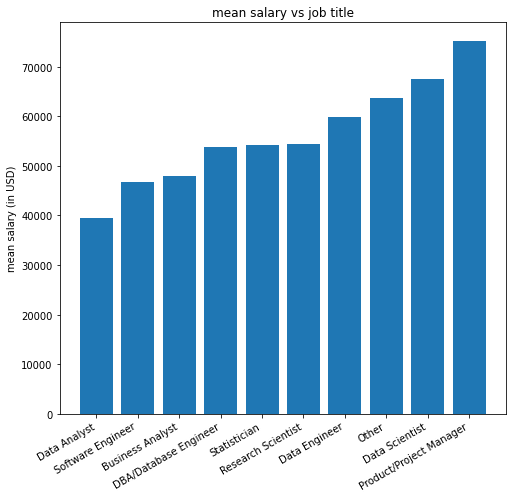

In [16]:
#new figure and associated axes
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

#group by job title and find mean salary for each group
data = kaggle_data.groupby(['job_title'])['salary_USD'].mean().sort_values(ascending=True)

#create bar plot
ax.bar(data.index, data);

#set labels and titles
ax.set_ylabel('mean salary (in USD)')
ax.set_title('mean salary vs job title')

#format x_ticks and y_ticks appropriately
fig.autofmt_xdate()

As we can see in the graph above, the product/project managers and data scientists command highest salary on average among repondents in our dataset.

## Trend 2: Coding Expereince (DS) VS Mean Salary

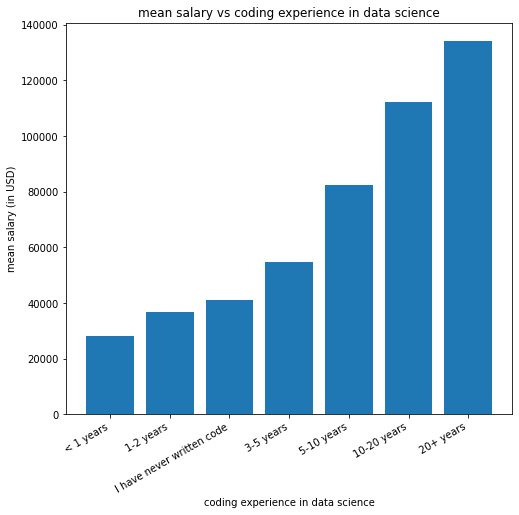

In [17]:
#new figure and associated axes
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

#group by DS coding experience and find mean salary for each group
data = kaggle_data.groupby(['DS_coding_experience'])['salary_USD'].mean().sort_values(ascending=True)

#create bar plot
ax.bar(data.index, data);

#set labels and titles
ax.set_xlabel('coding experience in data science')
ax.set_ylabel('mean salary (in USD)')
ax.set_title('mean salary vs coding experience in data science')

#format x_ticks and y_ticks appropriately
fig.autofmt_xdate()

As we can see in the graph above, the salary increases with experience in general. It seems that the increase is exponential. However, it may be because the respondents with experience less than 1 year could be students, and they are not working full time yet.

## Trend 3: Age VS Mean Salary

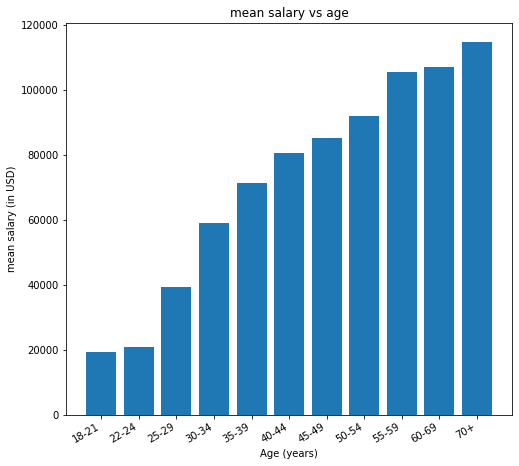

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()
data = kaggle_data.groupby(['age'])['salary_USD'].mean().sort_values(ascending=True)
ax.bar(data.index, data);
ax.set_xlabel('Age (years)')
ax.set_ylabel('mean salary (in USD)')
ax.set_title('mean salary vs age')
fig.autofmt_xdate()

The averge salary increases with increase in age. This directly relates to trend we observed in previous graph. However, in this graph, the increase doesn't seem exponential. 

# Q2 Estimating the difference between average salary (Q10) of males vs. females.

## Q2a: Compute and report descriptive statistics for each group (remove missing data, if necessary).

Gender column has four distinct values in our dataset.  We will only consider two groups: Males and Females.

In [19]:
#filter df based on gender
filter1 = kaggle_data['gender'].isin(['Male','Female'])

In [20]:
#df with column of interest for question 2
df_q2 = kaggle_data.loc[filter1, ['gender', 'salary_USD']]

### descriptive statistics of male and female group for salary

In [21]:
df_q2.groupby(['gender']).describe()

salary_USD                                                       \
            count          mean           std     min     25%      50%   
gender                                                                   
Female     1827.0  45933.771210  60253.789591  1000.0  3000.0  20000.0   
Male      10473.0  58709.586556  74920.620048  1000.0  7500.0  30000.0   

                           
            75%       max  
gender                     
Female  70000.0  500000.0  
Male    80000.0  500000.0

We can see that the mean salary for females is comparatively less than males. Also, the number of female respondents in survey are very less in comparision to males. This supports the fact that few females are working in STEM.

The numbers we obtained above doesn't provide full picture. Let's look at the box plot for both groups.

### Distribution of salary among females and males 

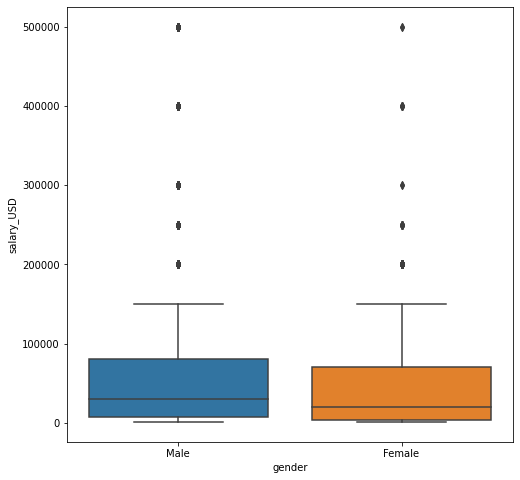

In [22]:
#new figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

#create box plots for males and females
ax = sns.boxplot(x="gender", y="salary_USD", data=df_q2)

We can see that the distributions have long tails. Though, this graph is not sufficient to understand how salary is distrbuted. Let's look at violin plot.

### Violin plot

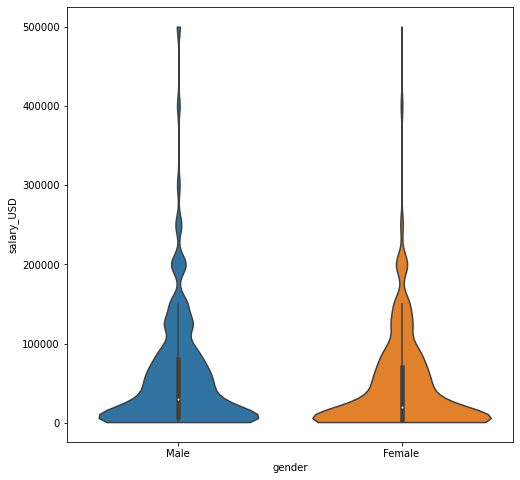

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()
ax = sns.violinplot(x="gender", y="salary_USD", data=df_q2, cut = 0)

The majority of both males and females have very less salary, less than mean values.

### Histogram

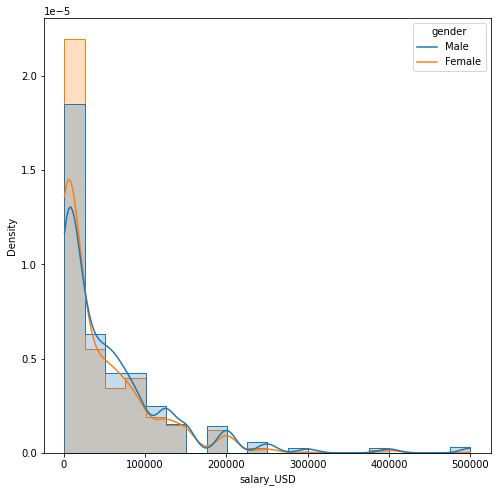

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()
sns.histplot(ax = ax, data=df_q2, x="salary_USD", hue="gender", element="step", bins=20, stat="density", common_norm=False);
sns.kdeplot(ax = ax, data=df_q2, x="salary_USD", hue="gender", common_norm=False, cut=0);

Finally, we can see that the distributions for both males and females are right skewed with long tails. Overall, the shape of distribution overlaps with each other. It is hard to conclude anything about difference in mean salary by looking at these histograms. For that, we will perform hypothesis test below.

Note: The densities are calculated by accounting for the disparity in the number of respondents between two groups. This is done by passing extra parameters to seaborn plot methods used above. 

## Q2b: If suitable, perform a two-sample t-test with 0.05 threshold. Explain your rationale.

If a population from which the data is collected violates any of the t-test assumptions, the result of analysis may be incorrect or misleading. In our case, the assumption of 'normality' is violated. The outliers are present in the sample, which is also representative of a population. We know that the salary can't be less than zero. And hence, the distribution will always be skewed. 

For these reasons, it doesn't seem appropriate to perform a two-sample t-test.

To overcome these challenges, we may need to transform data in some way. Here, we are using bootstraping as demonstarted below.

## Q2c: Bootstrap your data for comparing the mean of salary (Q10) for the two groups. Note that the number of instances you sample from each group should be relative to its size. Use 1000 replications. Plot two bootstrapped distributions (for males and females) and the distribution of the difference in means.

### Bootstrapping

In bootstrapping, we resample data from our original sample with replacement. Ideally, we want to resample as many points as we have in our original sample.

Here, we are creating two bootstrapped samples--one for male and another for female. we are resampling for the same number of points as we have in our original dataset for both groups (maintaining the resampling instances relative to each group's size). In total we create 1000 replications. For each, replication the mean salary is calculated.

In [25]:
#create seperated df for males and females to use in bootstraping
df_male = df_q2[df_q2['gender'] == 'Male']
df_female = df_q2[df_q2['gender'] == 'Female']

In [26]:
male_bootstrap = []
female_bootstrap = []
for i in range(1000):
    #sample from df_male with replacement. Frac = 1 indicates that n is equal to observation in original df
    mean_male = df_male['salary_USD'].sample(frac=1, replace=True).mean()
    #sample from df_female with replacement. Frac = 1 indicates that n is equal to observation in original df
    mean_female = df_female['salary_USD'].sample(frac=1, replace=True).mean()
    male_bootstrap.append(mean_male)
    female_bootstrap.append(mean_female)

### Bootstrapped distribution of means for males and females

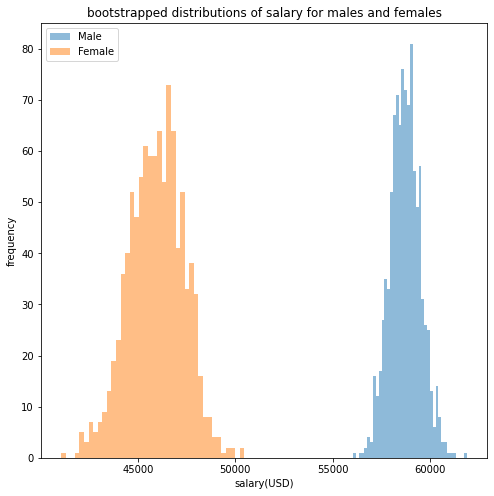

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()
plt.hist(male_bootstrap, bins = 40, label = 'Male', alpha = 0.5)
plt.hist(female_bootstrap, bins = 40, label = 'Female', alpha = 0.5)
plt.legend()
plt.xlabel('salary(USD)')
plt.ylabel('frequency')
plt.title('bootstrapped distributions of salary for males and females');

We can observe that bootstrapping removes the skew and yields distributions identical to normal distributions. We can also observe that both distribution are significantly apart from each other.

### Bootstrapped distribution of difference in mean

In [28]:
#find the diff in mean salary for each bootstrapped sample
diff_mean = np.array(male_bootstrap) - np.array(female_bootstrap)

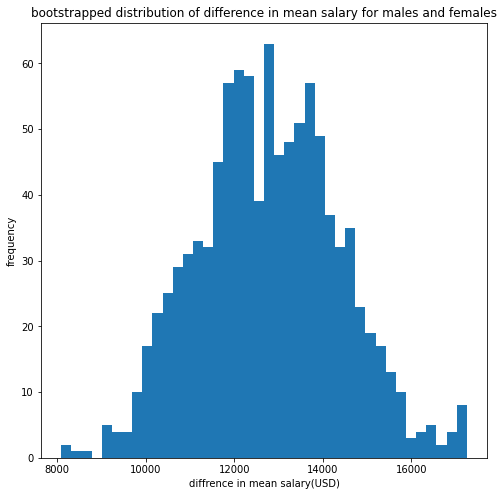

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()
plt.hist(diff_mean, bins = 40)
plt.xlabel('diffrence in mean salary(USD)')
plt.ylabel('frequency')
plt.title('bootstrapped distribution of difference in mean salary for males and females');

The differences of mean salary between two groups for bootstrapped samples are plotted above. It's distribution is identical to normal distribution, and mean is approxiamtly same as the difference between the mean of two distributions we obtained above.

## Q2d: If suitable, perform a two-sample t-test with 0.05 threshold on the bootstrapped data. Explain your rationale.

### Rationale to perform t-test:

We can perform t-test on bootstrapped samples as it doesn't severly violate the assumptions of t-test. Given that the distributions are identical to normal distribution, we can be confident in the outcome of test.

### Hypothesis testing

#### Null hypothesis
$H_0$: There's no difference between the mean of female salary and male salary. <br>

#### Alternate hypothesis
$H_a$: There's a difference between the mean of female salary and male salary. (bootstrap) <br>

#### level of significance
$\alpha$ = 5%

In [30]:
ttest, pval= stats.ttest_ind(female_bootstrap, male_bootstrap)

print('t-statistics:', ttest)
print('p-value:', pval)
if pval < 0.05:
    print('p-values is less than 0.05; reject null hypothesis at 5% level of significance.')
else:
    print('p-values is greater than 0.05; hence, do not reject null hypothesis at 5% level of significance.')

t-statistics: -250.8287732373092
p-value: 0.0
p-values is less than 0.05; reject null hypothesis at 5% level of significance.


## Q2e: Comment on your findings.

#### We have found enough evidence to reject null hypothesis at 5% level of significance. Which suggests that there is a significant difference between mean salary of male and female.

# Q3 Select “highest level of formal education” (Q4) from the dataset and repeat steps a to e, this time use analysis of variance (ANOVA) instead of t test for hypothesis testing to compare the means of salary for three groups (Bachelor’s degree, Doctoral degree, and Master’s degree).

## Q3a: Compute and report descriptive statistics for each group (remove missing data, if necessary).

Education column has seven distinct values in our dataset.  We will only consider three groups: Doctoral degree, Master’s degree, Bachelor’s degree.

In [31]:
#filter df based on education level
filter2 = kaggle_data['education'].isin(['Master’s degree', 'Bachelor’s degree', 'Doctoral degree'])

In [32]:
#df with column of interest for question 3
df_q3 = kaggle_data.loc[filter2, ['education', 'salary_USD']]

In [33]:
df_q3.head()

,education,salary_USD
id,,
0,Master’s degree,40000
3,Master’s degree,300000
4,Bachelor’s degree,5000
5,Master’s degree,70000
6,Master’s degree,15000


### descriptive statistics of three groups for salary

In [34]:
df_q3.groupby(['education']).describe()

salary_USD                                               \
                       count          mean           std     min      25%   
education                                                                   
Bachelor’s degree     3361.0  44999.256174  67923.680798  1000.0   3000.0   
Doctoral degree       2083.0  75761.401824  83376.717093  1000.0  15000.0   
Master’s degree       5868.0  58778.629857  70265.728605  1000.0   7500.0   

                                                
                       50%       75%       max  
education                                       
Bachelor’s degree  15000.0   60000.0  500000.0  
Doctoral degree    60000.0  100000.0  500000.0  
Master’s degree    40000.0   80000.0  500000.0

We can see that mean salary for people with doctoral degrees are high compare to other groups.

## box plot

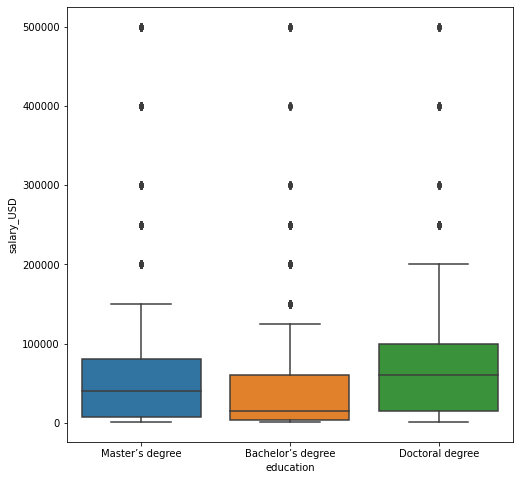

In [35]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()
ax = sns.boxplot(x="education", y="salary_USD", data=df_q3)

## violin plot

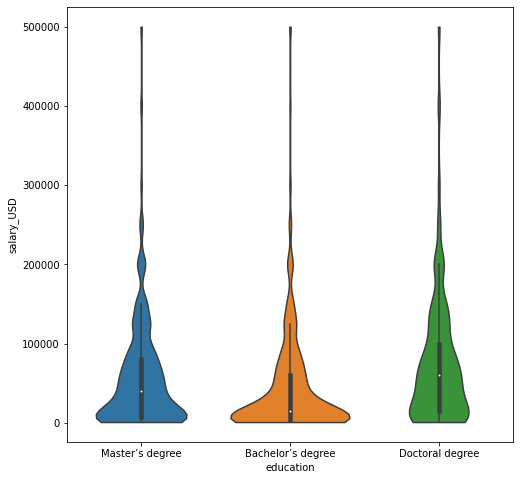

In [36]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()
ax = sns.violinplot(x="education", y="salary_USD", data=df_q3, cut = 0)

## Histogram

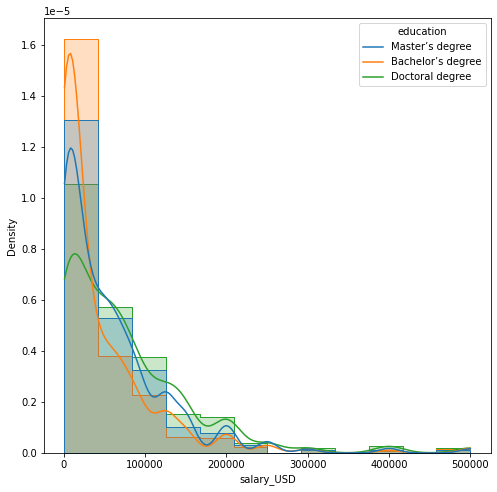

In [37]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()
sns.histplot(ax = ax, data=df_q3, x="salary_USD", hue="education", element="step", bins=12, stat="density", common_norm=False);
sns.kdeplot(ax = ax, data=df_q3, x="salary_USD", hue="education", common_norm=False, cut=0);

All three distributions follow all the characterstic that we mentioned in the answer of question 2a.

## Q3b: If suitable, perform a ANOVA test with 0.05 threshold. Explain your rationale.

For similar reasons to those given in answer of question 2b, we can not use ANVOA directly. The reason being skewness, outliers, and violation of normality.

## Q2c: Bootstrap your data for comparing the mean of salary (Q10) for the three groups. Note that the number of instances you sample from each group should be relative to its size. Use 1000 replications. Plot three bootstrapped distributions and the distribution of the difference in means.

### Bootstrapping

In [38]:
#create seperated df for males and females to use in bootstraping
df_doctoral = df_q3[df_q3['education'] == 'Doctoral degree']
df_masters = df_q3[df_q3['education'] == 'Master’s degree']
df_bachelor = df_q3[df_q3['education'] == 'Bachelor’s degree']

In [39]:
doctoral_bootstrap = []
masters_bootstrap = []
bachelor_bootstrap = []
for i in range(1000):
    #sample from df_male with replacement. Frac = 1 indicates that n is equal to observation in original df
    mean_doctoral = df_doctoral['salary_USD'].sample(frac=1, replace=True).mean()
    #sample from df_female with replacement. Frac = 1 indicates that n is equal to observation in original df
    mean_masters = df_masters['salary_USD'].sample(frac=1, replace=True).mean()
    #sample from df_female with replacement. Frac = 1 indicates that n is equal to observation in original df
    mean_bachelor = df_bachelor['salary_USD'].sample(frac=1, replace=True).mean()
    doctoral_bootstrap.append(mean_doctoral)
    masters_bootstrap.append(mean_masters)
    bachelor_bootstrap.append(mean_bachelor)

### Bootstrapped distribution of means for different education levels

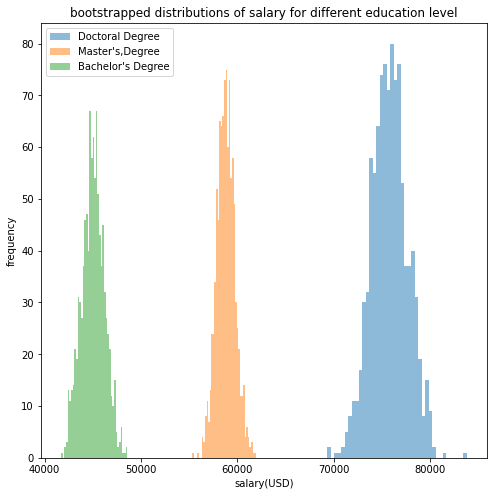

In [40]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()
plt.hist(doctoral_bootstrap, bins = 40, label = "Doctoral Degree", alpha = 0.5)
plt.hist(masters_bootstrap, bins = 40, label = "Master's,Degree", alpha = 0.5)
plt.hist(bachelor_bootstrap, bins = 40, label = "Bachelor's Degree", alpha = 0.5)
plt.legend()
plt.xlabel('salary(USD)')
plt.ylabel('frequency')
plt.title('bootstrapped distributions of salary for different education level');

### Bootstrapped distribution of difference in means

In [41]:
#find the diff in mean salary for each bootstrapped sample
diff_masters_bachelor = np.array(masters_bootstrap) - np.array(bachelor_bootstrap)
diff_doctoral_masters = np.array(doctoral_bootstrap) - np.array(masters_bootstrap)
diff_doctoral_bachelor = np.array(doctoral_bootstrap) - np.array(bachelor_bootstrap)

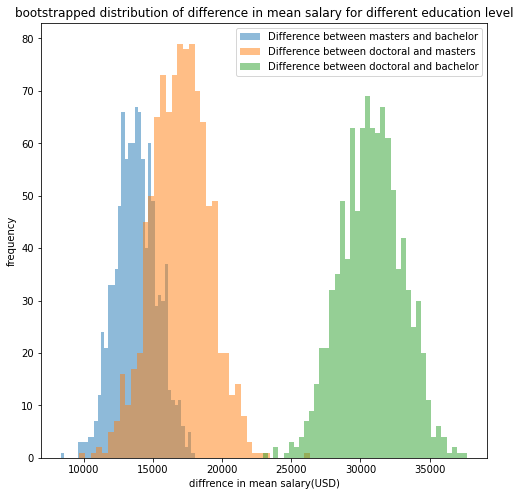

In [42]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()
plt.hist(diff_masters_bachelor, bins = 40, label = "Difference between masters and bachelor", alpha = 0.5)
plt.hist(diff_doctoral_masters, bins = 40, label = "Difference between doctoral and masters", alpha = 0.5)
plt.hist(diff_doctoral_bachelor, bins = 40, label = "Difference between doctoral and bachelor", alpha = 0.5)
plt.legend()
plt.xlabel('diffrence in mean salary(USD)')
plt.ylabel('frequency')
plt.title('bootstrapped distribution of difference in mean salary for different education level');

## Q3d: If suitable, perform a ANOVA with 0.05 threshold on the bootstrapped data. Explain your rationale.

### Rationale to perform ANOVA:

The ditributions obtained after bootstraping are identical to normal distribution. No outliers and skewness. Hence, we can use ANOVA for hypothesis testing

### Hypothesis testing

#### Null hypothesis
$H_0$: There's no difference between the mean of salaries for people with Doctoral, Masters, or Bachelor degrees. <br>

#### Alternate hypothesis
$H_a$: There's a difference between the mean of salaries among peole with Doctoral, Masters, and Bachelor degrees. (bootstrap) <br>

#### level of significance
$\alpha$ = 5%

In [43]:
#calculate the test statistics and p-value
ftest, pval = stats.f_oneway(masters_bootstrap, doctoral_bootstrap, bachelor_bootstrap)

#print the values
print('f-statistics:', ftest)
print('p-value:', pval)

#test the hypothesis
if pval < 0.05:
    print('p-values is less than 0.05; reject null hypothesis at 5% level of significance.')
else:
    print('p-values is greater than 0.05; hence, do not reject null hypothesis at 5% level of significance.')

f-statistics: 124455.29931401365
p-value: 0.0
p-values is less than 0.05; reject null hypothesis at 5% level of significance.


## Q3e: Comment on your findings.

#### We have found enough evidence to reject null hypothesis at 5% level of significance. Which suggests that there is a significant difference between mean salary among different education levels under consideration--bachelor, masters, and doctoral degrees.